##### Modélisation
Pour cette partie, nous allons dans l'ordre:
- supprimer la ligne dupliquée 
- diviser notre dataset en trainset et en testset
- traiter les labels rares que nous avons constatés dans la variable 'children' si nécessaire
- écrire des fonctions pour automatiser l'encodage de nos variables catégorielles
- entrainer différents modèles de machine learning pour garder les deux plus performants
- optimiser les hyperparamètres de ces deux modèles afin d'en retenir le meilleur
- écrire ensuite une pipeline pour automatiser toute cette partie en utilisant la pipeline de scikit-learn

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [3]:
data = pd.read_csv('insurance.csv')
data.shape

(1338, 7)

In [4]:
df = data.copy()

In [5]:
# dropping the duplicated row
df.drop_duplicates(inplace = True)

In [6]:
df.shape

(1337, 7)

In [7]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
# Divisons le dataset en testset et trainset
trainset, testset = train_test_split(df, test_size = 0.1, random_state=0)

In [6]:
trainset.shape

(1204, 7)

In [9]:
testset.shape

(134, 7)

In [7]:
Cont_Var = [col for col in trainset.columns if (col not in 'children' and trainset[col].dtypes != 'O')] 
print(Cont_Var)

['age', 'bmi', 'charges']


In [8]:
Cat_Var = [col for col in trainset.columns if col not in Cont_Var]
Cat_Var

['sex', 'children', 'smoker', 'region']

In [9]:
for col in Cat_Var:
    print(col)
    for label in df[col].unique():
        print (f"{label:-<50} {len (df[df[col] == label])/df.shape[0]}")

sex
female-------------------------------------------- 0.4947683109118087
male---------------------------------------------- 0.5052316890881914
children
0------------------------------------------------- 0.4289985052316891
1------------------------------------------------- 0.242152466367713
3------------------------------------------------- 0.11733931240657698
2------------------------------------------------- 0.17937219730941703
5------------------------------------------------- 0.013452914798206279
4------------------------------------------------- 0.01868460388639761
smoker
yes----------------------------------------------- 0.20478325859491778
no------------------------------------------------ 0.7952167414050823
region
southwest----------------------------------------- 0.2428998505231689
southeast----------------------------------------- 0.27204783258594917
northwest----------------------------------------- 0.2428998505231689
northeast----------------------------------------- 0.2421

In [10]:
for col in Cat_Var:
    print(col)
    for label in trainset[col].unique():
        print (f"{label:-<50} {len (trainset[trainset[col] == label])/trainset.shape[0]}")

sex
male---------------------------------------------- 0.4983388704318937
female-------------------------------------------- 0.5016611295681063
children
0------------------------------------------------- 0.4277408637873754
2------------------------------------------------- 0.18023255813953487
1------------------------------------------------- 0.2441860465116279
3------------------------------------------------- 0.11461794019933555
4------------------------------------------------- 0.01910299003322259
5------------------------------------------------- 0.014119601328903655
smoker
yes----------------------------------------------- 0.19850498338870431
no------------------------------------------------ 0.8014950166112956
region
southwest----------------------------------------- 0.24584717607973422
southeast----------------------------------------- 0.27408637873754155
northwest----------------------------------------- 0.23754152823920266
northeast----------------------------------------- 0.2

In [11]:
for col in Cat_Var:
    print(col)
    for label in testset[col].unique():
        print (f"{label:-<50} {len (testset[testset[col] == label])/testset.shape[0]}")

sex
male---------------------------------------------- 0.5671641791044776
female-------------------------------------------- 0.43283582089552236
children
1------------------------------------------------- 0.22388059701492538
2------------------------------------------------- 0.17164179104477612
0------------------------------------------------- 0.44029850746268656
3------------------------------------------------- 0.1417910447761194
5------------------------------------------------- 0.007462686567164179
4------------------------------------------------- 0.014925373134328358
smoker
no------------------------------------------------ 0.7388059701492538
yes----------------------------------------------- 0.26119402985074625
region
southwest----------------------------------------- 0.21641791044776118
southeast----------------------------------------- 0.2537313432835821
northwest----------------------------------------- 0.291044776119403
northeast----------------------------------------- 0.2

In [12]:
for col in Cat_Var:
    print(testset[col].value_counts())

male      76
female    58
Name: sex, dtype: int64
0    59
1    30
2    23
3    19
4     2
5     1
Name: children, dtype: int64
no     99
yes    35
Name: smoker, dtype: int64
northwest    39
southeast    34
northeast    32
southwest    29
Name: region, dtype: int64


In [13]:
for col in Cat_Var:
    print(trainset[col].value_counts())

female    604
male      600
Name: sex, dtype: int64
0    515
1    294
2    217
3    138
4     23
5     17
Name: children, dtype: int64
no     965
yes    239
Name: smoker, dtype: int64
southeast    330
southwest    296
northeast    292
northwest    286
Name: region, dtype: int64


In [14]:
# Cette fonction va remplacer les labels dont la fréquence est inférieurs à 2% par le label 'rare'

def find_frequent_labels(df, var, rare_perc):
    

    df = df.copy()

    tmp = df.groupby(var)['charges'].count() / len(df)

    return tmp[tmp > rare_perc].index


for var in Cat_Var:
    
    # recherche des labels fréquents
    frequent_ls = find_frequent_labels(trainset, var, 0.015)
    
    # remplace les catégories rares par 4
    trainset[var] = np.where(trainset[var].isin(
        frequent_ls), trainset[var], 4)
    
    testset[var] = np.where(testset[var].isin(
        frequent_ls), testset[var], 4)

In [15]:
for col in Cat_Var:
    print(trainset[col].value_counts())

female    604
male      600
Name: sex, dtype: int64
0    515
1    294
2    217
3    138
4     40
Name: children, dtype: int64
no     965
yes    239
Name: smoker, dtype: int64
southeast    330
southwest    296
northeast    292
northwest    286
Name: region, dtype: int64


In [16]:
for col in Cat_Var:
    print(testset[col].value_counts())

male      76
female    58
Name: sex, dtype: int64
0    59
1    30
2    23
3    19
4     3
Name: children, dtype: int64
no     99
yes    35
Name: smoker, dtype: int64
northwest    39
southeast    34
northeast    32
southwest    29
Name: region, dtype: int64


On voit clairement les labels 5 dans la variable 'children' ont été transformé en 4. L'idée, c'est de mettre ces deux labels ensemble car chacun occupe une trop petite proportion dataset. Ceci a un double avantage: 1) On ne change pas le type de la variable 2) On diminue les variables rares 3) Etant donné que plus on a d'enfants, plus les charges annuelles sont élevées, en encodant de la sorte, cela envoie une information importante au modèle.

In [17]:
def encodage (df, var='region'):

    code = {'male': 0,
                'female': 1,
                'yes': 1,
                'no': 0
               }
    for col in df.select_dtypes('O').columns:
        if col !=var:
            df.loc[:,col] = df[col].map(code)
    return df         

In [22]:
#def second_encoding(df,var_cat='children'):
    #df = pd.concat([df, pd.get_dummies(df[var_cat], prefix='num_children', drop_first=True)], axis=1)
    #df = pd.DataFrame(df.drop(columns=[var_cat], axis = 1, inplace = True))
    #return df
     

In [18]:
def final_encoding(df,var_cat='region'):
    df = pd.concat([df, pd.get_dummies(df[var_cat], prefix=var_cat, drop_first=True)], axis=1)
    #df = pd.DataFrame(df.drop(columns=[var_cat], axis = 1, inplace = True))
    return df
     

In [19]:
def preprocessing (df):
    df = encodage(df)
    #df = second_encoding(df)
    df = final_encoding(df)
    
    X = df.drop(['charges','region',], axis=1)
    y = df['charges']
    

    return X , y

In [20]:
X_train,y_train = preprocessing(trainset)

In [21]:
X_train

,age,sex,bmi,children,smoker,region_northwest,region_southeast,region_southwest
461,42,0,30.00,0,1,0,0,1
322,34,0,30.80,0,1,0,0,1
224,42,0,24.64,0,1,0,1,0
711,50,1,23.54,2,0,0,1,0
58,53,1,22.88,1,1,0,1,0
...,...,...,...,...,...,...,...,...
763,27,0,26.03,0,0,0,0,0
835,42,0,35.97,2,0,0,1,0
1216,40,0,25.08,0,0,0,1,0
559,19,0,35.53,0,0,1,0,0


In [22]:
X_test,y_test = preprocessing(testset)

In [23]:
X_test.head()

,age,sex,bmi,children,smoker,region_northwest,region_southeast,region_southwest
578,52,0,30.200,1,0,0,0,1
610,47,1,29.370,1,0,0,1,0
569,48,0,40.565,2,1,1,0,0
1034,61,0,38.380,0,0,1,0,0
198,51,1,18.050,0,0,1,0,0


Nous venons là d'écrire une séquence de fonctions permettant d'automatiser la phase de preprocessing des données. On peut à présent entrainer tout un tas de modèles.

#### Sélection de variable: 

Etant donné que nous avons très peu de variables, nous allons d'abord entraîner nos modèles, évaluer leurs performances et essayer de les améliorer en optimisant leurs hyparamètres et s'il le faut, en faisant une sélection de variables.

### Procédure d'évaluation

In [33]:
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score,validation_curve

In [34]:
def model_summary(model, cvn=5):
    
    model.fit(X_train,y_train)
    
    print(cross_val_score(model, X_train, y_train, cv=10).mean())
                                               
    y_pred = model.predict(X_test)
    coef_det = r2_score(y_test,y_pred) 
    print(f'Le coefficient de détermination est: {coef_det}')
    MAE = mean_absolute_error(y_test,y_pred)
    print(f'erreur absolue moyenne est: {MAE}')
    MSE = mean_squared_error(y_test,y_pred)
    print(f'erreur quadratique moyenne est: {MSE}')
    print(f'La MSE est: {np.sqrt(MSE)}')
    print(f'Ecart-type des erreurs est: {np.std(abs(y_test-y_pred))}')
    print('----------------------------------------')
    sns.displot(y_test-y_pred)
    
    #plt.scatter(y_test,y_pred)

#### Modelisation

In [35]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor,GradientBoostingRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, SGDRegressor

In [36]:
RandomForest = RandomForestRegressor(random_state=42)
AdaBoost = AdaBoostRegressor(random_state=0)
GradientBoost = GradientBoostingRegressor(random_state = 0)
#NaiveBayes = make_pipeline(pre_processor, GaussianNB ())
SVM = make_pipeline(StandardScaler(), SVR())
LSVC = make_pipeline(StandardScaler(), LinearSVR(random_state=0, tol=1e-05))
KNN = make_pipeline(StandardScaler(), KNeighborsRegressor())
LR = make_pipeline(StandardScaler(), LinearRegression())
SGD = make_pipeline(StandardScaler(), SGDRegressor(max_iter=1000, tol=1e-3))

In [37]:
models_dict = {'RandomForest': RandomForest,
                  'AdaBoost' : AdaBoost,
                  'SVM': SVM,
                  'KNN': KNN,
                  'GBT': GradientBoost, 
                  'LM': LR,
                  'SGDR': SGD,
                  'LSVC':LSVC
                  
               
                 }

RandomForest
0.808914459542853
Le coefficient de détermination est: 0.9019701214997495
erreur absolue moyenne est: 2683.853436817313
erreur quadratique moyenne est: 19008331.240620796
La MSE est: 4359.854497643332
Ecart-type des erreurs est: 3435.8786314863755
----------------------------------------
AdaBoost
0.7994157628038236
Le coefficient de détermination est: 0.8628507387097809
erreur absolue moyenne est: 4554.170687478467
erreur quadratique moyenne est: 26593714.36438406
La MSE est: 5156.909381052188
Ecart-type des erreurs est: 2419.347786841729
----------------------------------------
SVM
-0.1075252698424199
Le coefficient de détermination est: -0.20258109239566968
erreur absolue moyenne est: 9916.482138644884
erreur quadratique moyenne est: 233184617.76840898
La MSE est: 15270.383681113222
Ecart-type des erreurs est: 11612.40714763076
----------------------------------------
KNN
0.7653834580179854
Le coefficient de détermination est: 0.875878044543266
erreur absolue moyenne est

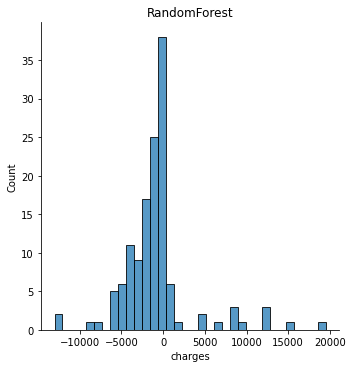

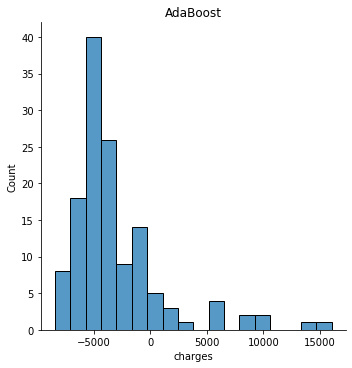

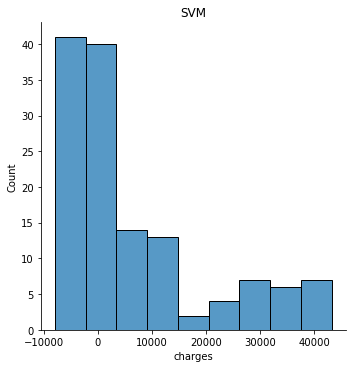

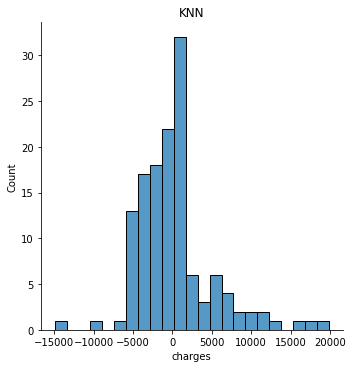

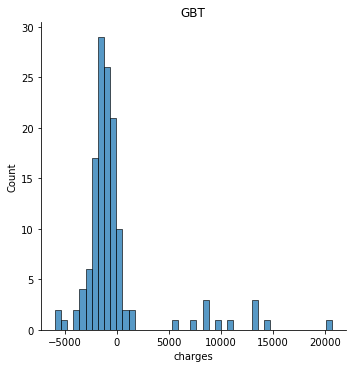

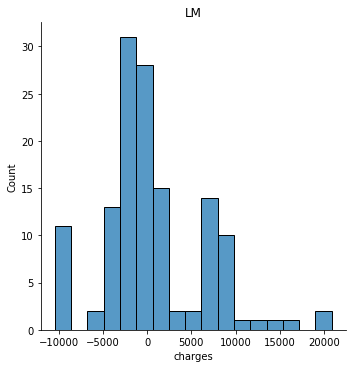

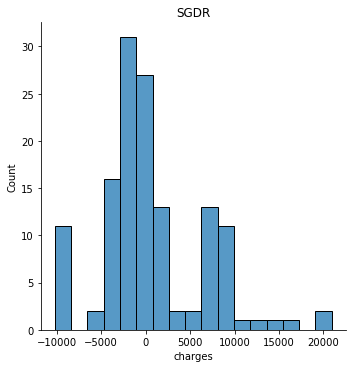

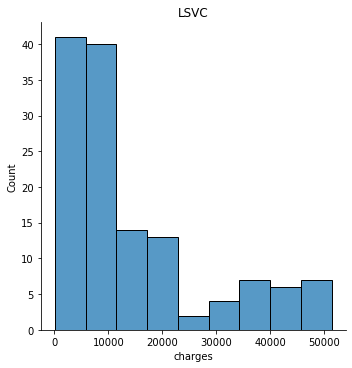

In [38]:
for name, model in models_dict.items():
    print(name)
    model_summary(model)
    plt.title(name)

In [39]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [40]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [41]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [42]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 50, cv = 10, verbose=2, random_state=42, n_jobs = -1)

In [43]:
rf_random.fit(X_train,y_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [44]:
grid = rf_random.best_estimator_

In [45]:
grid

RandomForestRegressor(max_depth=5, min_samples_leaf=5, n_estimators=500)

In [40]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=5, min_samples_leaf=5, n_estimators=500)

Le coefficient de détermination est: 0.9256748833672623
erreur absolue moyenne est: 2270.6379002834265
erreur quadratique moyenne est: 14411896.23069094
La RMSE est: 3796.300334627246
----------------------------------------
Ecart-type des erreurs est: 3042.383893674073
La médiane des y_test:10354.2909


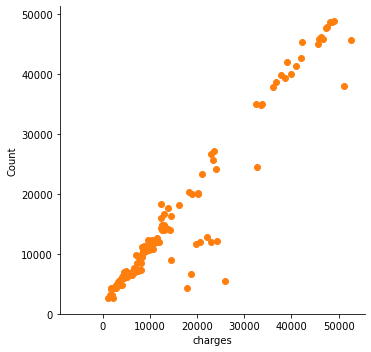

In [46]:
y_pred = grid.predict(X_test)
coef_det = r2_score(y_test,y_pred)
print(f'Le coefficient de détermination est: {coef_det}')
MAE = mean_absolute_error(y_test,y_pred)
print(f'erreur absolue moyenne est: {MAE}')
MSE = mean_squared_error(y_test,y_pred)
print(f'erreur quadratique moyenne est: {MSE}')
print(f'La RMSE est: {np.sqrt(MSE)}')
print('----------------------------------------')
print(f'Ecart-type des erreurs est: {np.std(abs(y_test-y_pred))}')
print(f'La médiane des y_test:{np.median(y_test)}')
plot_1=sns.displot(y_test-y_pred)
plot_2=plt.scatter(y_test,y_pred)

###### Essayons de laisser tomber certaines variables

In [42]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X_train, y_train)

ExtraTreesRegressor()

In [43]:
print(selection.feature_importances_)

[0.12607948 0.01101121 0.19075195 0.02150863 0.62548105 0.00955711
 0.00937517 0.0062354 ]


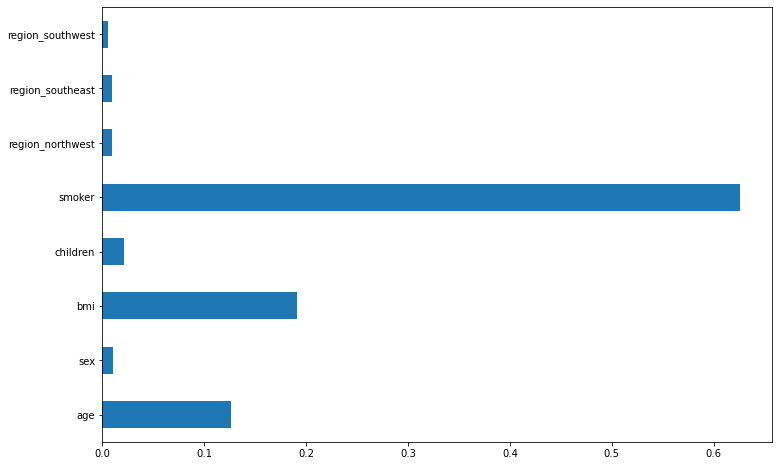

In [44]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X_train.columns)
feat_importances.plot(kind='barh')
plt.show()

In [48]:
rf_reg = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 50, cv = 10, verbose=2, random_state=42, n_jobs = -1)

In [49]:
rf_reg.fit(X_train[['smoker','children','bmi','sex','age']],y_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100

[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=100; total time=   0.0s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=900; total time=   1.0s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=900; total time=   1.0s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=900; total time=   1.0s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=900; total time=   1.0s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=900; total time=   1.0s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=900; total time=   1.0s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=900; total time=   1.0s
[CV] END max_depth=25, max_feat

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=900; total time=   1.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=900; total time=   1.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=900; total time=   1.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=500; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=500; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=500; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=500; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=500; total time=   0.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   1.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   1.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   1.3s
[CV] END max_depth=15,

[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=300; total time=   0.3s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=300; total time=   0.3s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=300; total time=   0.3s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=300; total time=   0.3s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=300; total time=   0.3s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=300; total time=   0.3s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=300; total time=   0.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max

[CV] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=900; total time=   1.5s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=900; total time=   1.4s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=900; total time=   1.5s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=900; total time=   1.6s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=900; total time=   1.5s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=900; total time=   1.5s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=900; total time=   1.4s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=900; total time=   1.5s
[CV] END max_depth=25, max_featu

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=600; total time=   0.7s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=900; total time=   1.4s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=900; total time=   1.5s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=900; total time=   1.4s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=900; total time=   1.4s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=900; total time=   1.4s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=900; total time=   1.5s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=900; total time=   1.4s
[CV] END max_depth=20, max_featu

[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=900; total time=   0.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=900; total time=   0.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=900; total time=   0.9s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=900; total time=   0.9s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=900; total time=   0.8s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=900; total time=   0.8s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=900; total time=   0.8s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=900; total time=   0.8s
[CV] END max_depth=30, max_

RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_iter=50,
                   n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

Le coefficient de détermination est: 0.9243323842231633
erreur absolue moyenne est: 2282.8688309527056
erreur quadratique moyenne est: 14672211.440825766
La RMSE est: 3830.432278584986
----------------------------------------
Ecart-type des erreurs est: 3075.8285617846764
La médiane des y_test:10354.2909


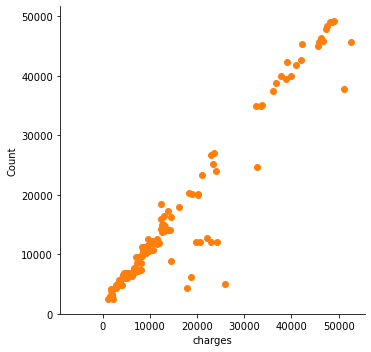

In [51]:
y_pred = rf_reg.best_estimator_.predict(X_test[['smoker','children','bmi','sex','age']])
coef_det = r2_score(y_test,y_pred)
print(f'Le coefficient de détermination est: {coef_det}')
MAE = mean_absolute_error(y_test,y_pred)
print(f'erreur absolue moyenne est: {MAE}')
MSE = mean_squared_error(y_test,y_pred)
print(f'erreur quadratique moyenne est: {MSE}')
print(f'La RMSE est: {np.sqrt(MSE)}')
print('----------------------------------------')
print(f'Ecart-type des erreurs est: {np.std(abs(y_test-y_pred))}')
print(f'La médiane des y_test:{np.median(y_test)}')
plot_1=sns.displot(y_test-y_pred)
plot_2=plt.scatter(y_test,y_pred)

In [52]:
rf_reg_2 = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 50, cv = 10,verbose=2, random_state=42, n_jobs = -1)

In [53]:
rf_reg_2.fit(X_train[['smoker','sex','bmi','age']],y_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [54]:
rf_reg_2.best_params_

{'n_estimators': 500,
 'min_samples_split': 2,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 5}

Le coefficient de détermination est: 0.9197362208602846
erreur absolue moyenne est: 2378.7151253839697
erreur quadratique moyenne est: 15563423.354725879
La RMSE est: 3945.050488235338
----------------------------------------
Ecart-type des erreurs est: 3147.2428738493318
La médiane des y_test:10354.2909


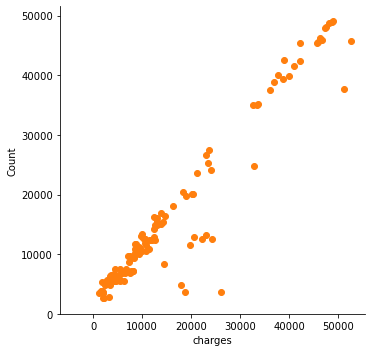

In [60]:
y_pred = rf_reg_2.best_estimator_.predict(X_test[['smoker','sex','bmi','age']])
coef_det = r2_score(y_test,y_pred)
print(f'Le coefficient de détermination est: {coef_det}')
MAE = mean_absolute_error(y_test,y_pred)
print(f'erreur absolue moyenne est: {MAE}')
MSE = mean_squared_error(y_test,y_pred)
print(f'erreur quadratique moyenne est: {MSE}')
print(f'La RMSE est: {np.sqrt(MSE)}')
print('----------------------------------------')
print(f'Ecart-type des erreurs est: {np.std(abs(y_test-y_pred))}')
print(f'La médiane des y_test:{np.median(y_test)}')
plot_1=sns.displot(y_test-y_pred))
plot_2=plt.scatter(y_test,y_pred)

In [47]:
param_grid = {'n_neighbors': np.arange(1,10)
              }

KNN_tuned = GridSearchCV(KNeighborsRegressor(), param_grid,scoring='neg_mean_squared_error',cv = 5, verbose=2, n_jobs = 1)

KNN_tuned.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_

GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=1,
             param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
             scoring='neg_mean_squared_error', verbose=2)

In [65]:
final_KNN_tuned=KNN_tuned.best_estimator_

In [66]:
print(final_KNN_tuned)

KNeighborsRegressor(n_neighbors=6)


Le coefficient de détermination est: 0.2680987554837567
erreur absolue moyenne est: 7861.813652425372
erreur quadratique moyenne est: 129508127.0647261
La MSE est: 11380.163753862513
----------------------------------------


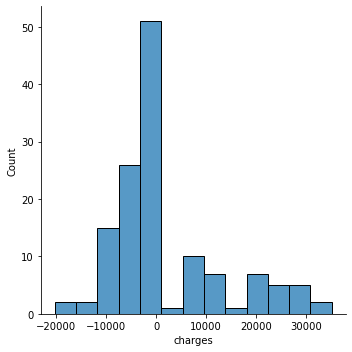

In [67]:
y_pred = final_KNN_tuned.predict(X_test)
coef_det = r2_score(y_test,y_pred)
print(f'Le coefficient de détermination est: {coef_det}')
MAE = mean_absolute_error(y_test,y_pred)
print(f'erreur absolue moyenne est: {MAE}')
MSE = mean_squared_error(y_test,y_pred)
print(f'erreur quadratique moyenne est: {MSE}')
print(f'La MSE est: {np.sqrt(MSE)}')
print('----------------------------------------')
sns.displot(y_test-y_pred)

###### Conclusion

Nous avons entraîné beaucoup de modèles:
- les modèles basés sur les arbres de décision sont les plus performants
- Le KNN n'est pas non plus mal mais l'optimisation des hyperparamètres n'a pas permis de l'améliorer
- LE SVR ne semble pas approprié pour ce dataset même si les données n'ont pas été suffisamment préparées pour ce modèle
- Les modèles linéaires pourraient faire un meilleur résultat si nous avions préparé les données en conséquence c-à-d:
      - supprimer les valeurs abérrantes qui sont nombreuses dans ce dataset
      - transformer certaines variables pourqu'elles soient une distribution normale
      - eventuellement utliser une régularisation (Lasso par exemple) pour sélectionner les variables.
###### En définitive, la sélection de variable n'ayant pas permis d'augmenter considérablement la performance de notre modèle, nous allons choisir le RandomForestRegressor en utilisant toutes les variables car il est le moins complexe parmi les modèles basés sur les arbres de décisions que nous avons entraînés.

In [56]:
import joblib

In [57]:
joblib.dump(rf_random, 'rf_regressor.pkl')

['rf_regressor.pkl']